In [76]:
import os
from io import open 

"""Writing the data per file into a dictionary for which the key is the category of news"""

import unicodedata
import string

all_letters = string.ascii_letters + ".,;'& "
n_letters = len(all_letters)

def unitoAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

def readFile_byline(filename):
    line_of_news = open("news_data_final/"+filename , encoding = 'utf-8').read().split('\n')    
    return [unitoAscii(line) for line in line_of_news]

In [77]:
category_news = {}
all_categories = []

list_of_files = os.listdir("news_data_final/")

#Dictionary which maps every category of news to it's description
for _file in list_of_files:
    category = _file.split(".")[0]
    all_categories.append(category)
    news_descp = readFile_byline(_file)
    category_news[category] = news_descp

num_categories = len(all_categories)
print(num_categories)

count_of_news_category = {}
average_words_per_number_of_samples = []

#Counting news items per category of news 
for key in category_news.keys():
    item = category_news.get(key)
    number_of_news_items = len(item)
    count_of_news_category[key] = number_of_news_items
    count_of_words = 0
    for sentence in item:
        count_of_words += len(sentence.split(" "))
    average_words_per_number_of_samples.append(count_of_words/number_of_news_items)

#print(count_of_news_category["WELLNESS"])
#print(category_news["CRIME"][0:2])
#print(average_words_per_number_of_samples)

29


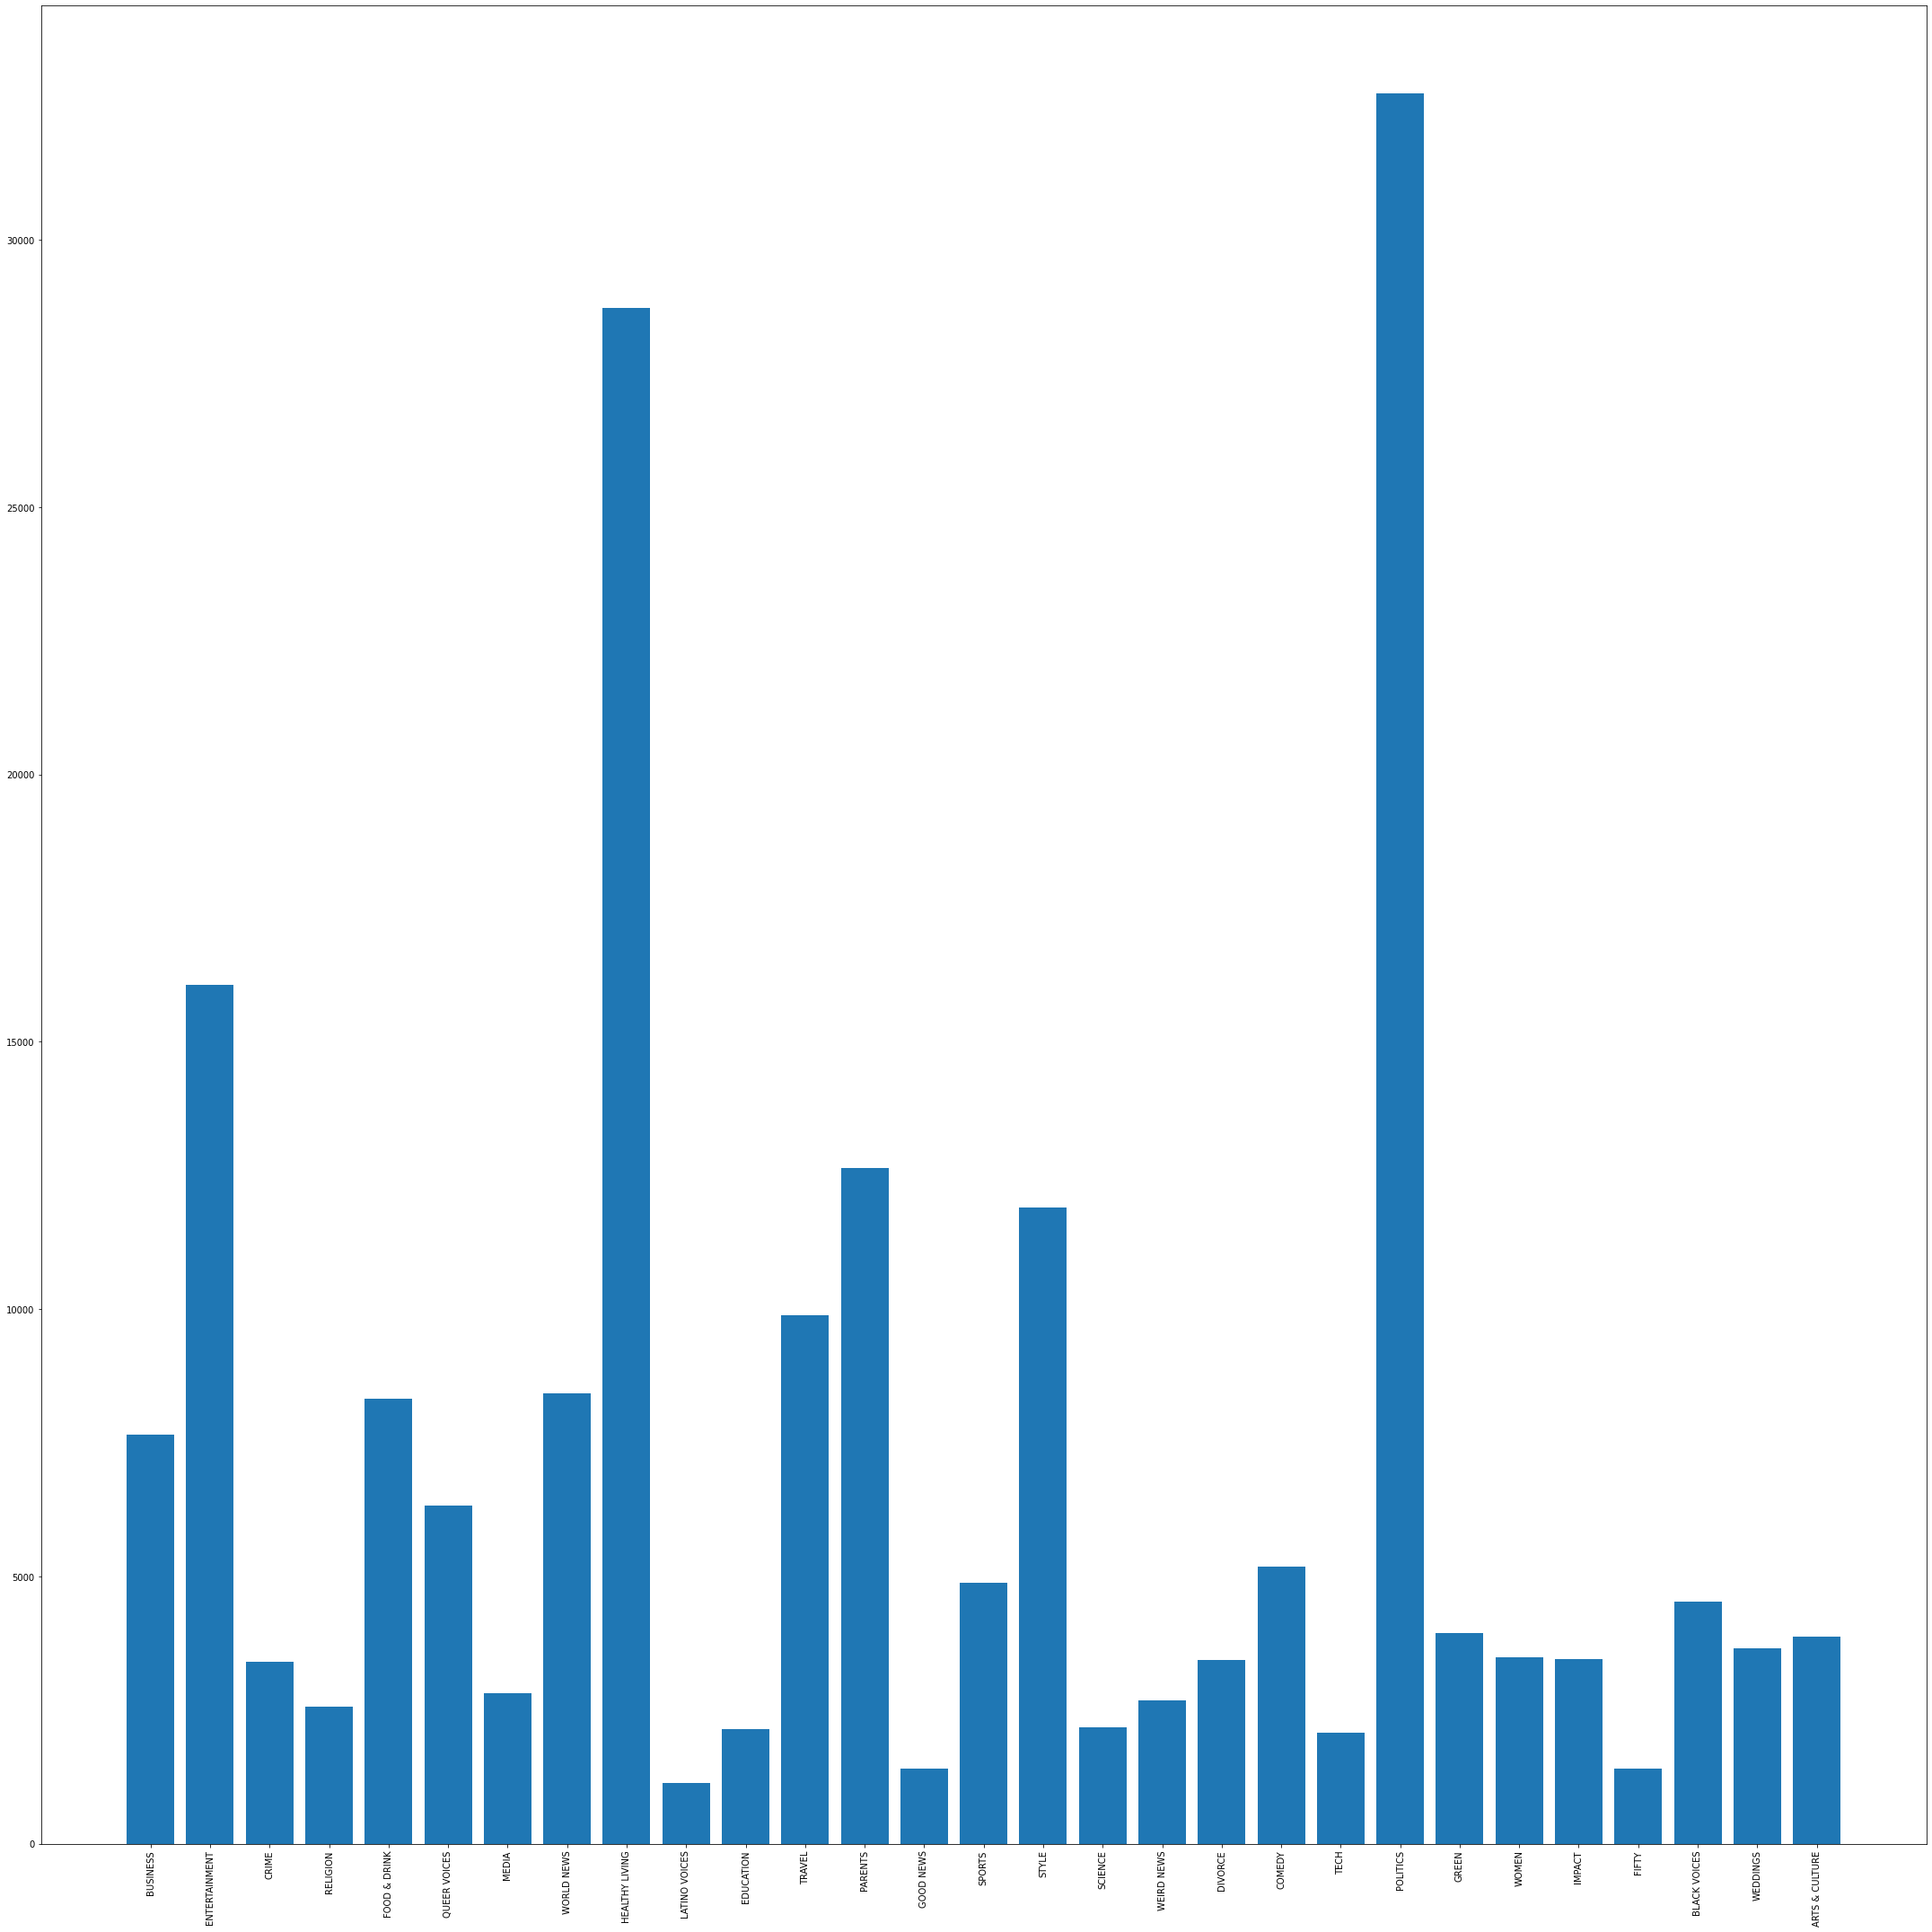

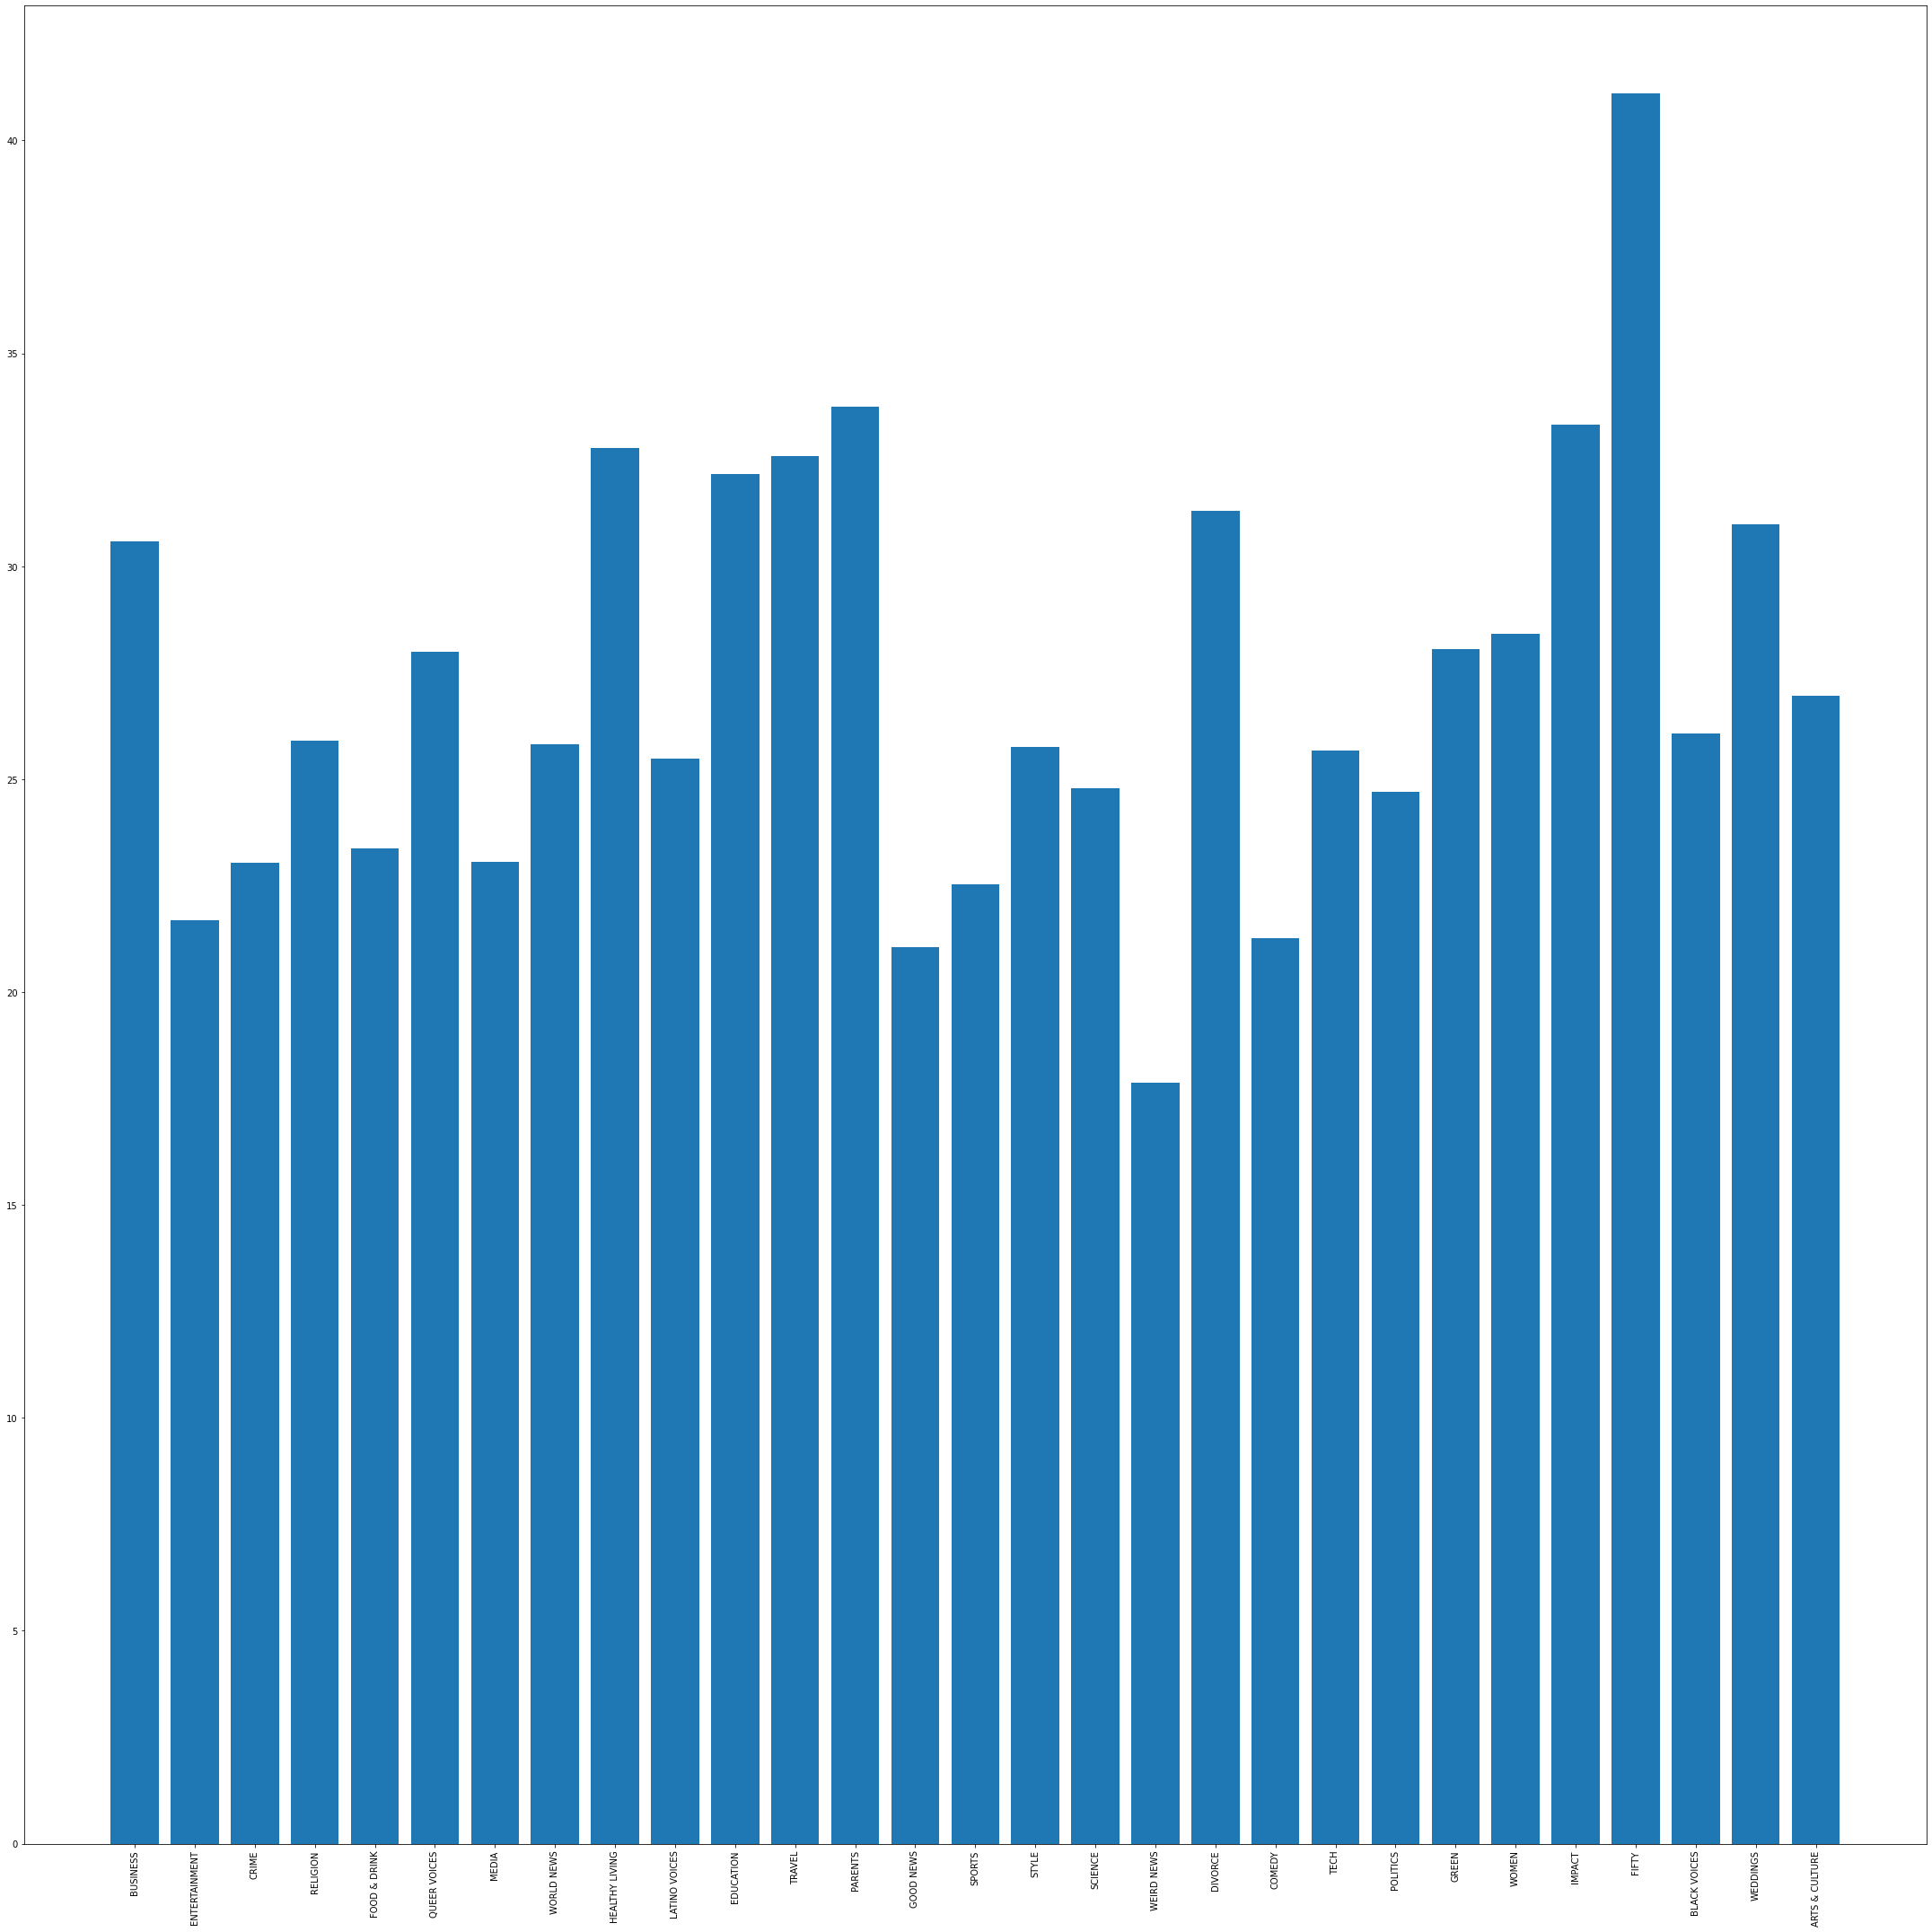

In [78]:
import random
import matplotlib
import matplotlib.pyplot as plt 

path = os.getcwd()
folder = "figs"
FILE = "Number_of_articles_per_category.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

fig = plt.figure()
category = count_of_news_category.keys()
value = count_of_news_category.values()
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(path_save)
plt.show()

path = os.getcwd()
folder = "figs"
FILE = "Words_per_category.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)



fig1 = plt.figure()
category = count_of_news_category.keys()
value = average_words_per_number_of_samples
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(path_save)
plt.show()

In [79]:
import torch
import torch.nn as nn 
from torch import optim
import torch.nn.functional as F 

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

def findIndexOfWordInSentence(sentence):
    indexOfWord = {}
    for index, word in enumerate(sentence):
        indexOfWord[word] = index
    return list(indexOfWord.values())

def sentenceToTensor(sentence):
    indexes = findIndexOfWordInSentence(sentence)
    return torch.tensor(indexes , dtype = torch.long, device = device).view(-1, 1)

category_plus_news_list = []

from nltk.corpus import stopwords

for key in category_news.keys():
    for news_item in category_news[key]:
        #news_item = [word for word in news_item.split(" ") if word not in stopwords.words('english')]
        #news_item = " ".join(word for word in news_item)
        category_plus_news_list.append((key, news_item))

print(category_plus_news_list[0])

def pairedTensor(pair):
    #pair is element in category_plus_news_list
    input_tensor = sentenceToTensor(pair[1])
    output_tensor = sentenceToTensor(pair[0])
    return (input_tensor, output_tensor)

#print(pairedTensor(category_plus_news_list[100]))

unique_words = []

'''for pair in category_plus_news_list:
    for word in pair[1].split(" "):
        if word.lower() not in unique_words:
            unique_words.append(word.lower())

print(unique_words[0:50])'''

cuda:0
('BUSINESS', 'U.S. Launches Auto Import Probe, China Vows To Defend Its Interests. The investigation could lead to new U.S. tariffs similar to those imposed on imported steel and aluminum in March.')


'for pair in category_plus_news_list:\n    for word in pair[1].split(" "):\n        if word.lower() not in unique_words:\n            unique_words.append(word.lower())\n\nprint(unique_words[0:50])'

In [80]:
list_of_sentences_business = []
list_of_sentences_politics = []
list_of_sentences_religion = []
list_of_sentences_food = []
list_of_sentences_home = []

list_of_sentences = []

labels =[]
count_of_lables=[]

for pair in category_plus_news_list:
    label = pair[0]
    sentences = pair[1]
    
    if len(sentences.split(" ")) >= 5:
    
        list_of_sentences.append(sentences)
        labels.append(label)
    
#print(list_of_sentences[0:20])
print(len(list_of_sentences))
#print((labels[0:20]))



198123


In [81]:
label_list = list(category_news.keys())
index_class_map_dict1={}

for idx, value in enumerate(label_list):
    index_class_map_dict1[value]=idx

print(index_class_map_dict1)
label_values = list(index_class_map_dict1.values())

{'BUSINESS': 0, 'ENTERTAINMENT': 1, 'CRIME': 2, 'RELIGION': 3, 'FOOD & DRINK': 4, 'QUEER VOICES': 5, 'MEDIA': 6, 'WORLD NEWS': 7, 'HEALTHY LIVING': 8, 'LATINO VOICES': 9, 'EDUCATION': 10, 'TRAVEL': 11, 'PARENTS': 12, 'GOOD NEWS': 13, 'SPORTS': 14, 'STYLE': 15, 'SCIENCE': 16, 'WEIRD NEWS': 17, 'DIVORCE': 18, 'COMEDY': 19, 'TECH': 20, 'POLITICS': 21, 'GREEN': 22, 'WOMEN': 23, 'IMPACT': 24, 'FIFTY': 25, 'BLACK VOICES': 26, 'WEDDINGS': 27, 'ARTS & CULTURE': 28}


In [82]:
number_labels=[]

for label in labels:
    number_labels.append(index_class_map_dict1[label])

In [83]:
import torch
torch.manual_seed(0)

import numpy as np
np.random.seed(0)

import random
random.seed(0)

In [84]:
from sklearn.model_selection import train_test_split

train_texts = list_of_sentences
train_labels = number_labels

train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=.2)


print(len(train_texts))
print(len(train_labels))
print(len(val_texts))

158498
158498
39625


In [85]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

train_encodings = tokenizer(train_texts, return_tensors='pt', truncation=True, padding=True)
val_encodings = tokenizer(val_texts, return_tensors='pt', truncation=True, padding=True)
print(train_encodings.keys())

dict_keys(['input_ids', 'attention_mask'])


In [86]:
class newsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: (val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = newsDataset(train_encodings, train_labels)
#print((train_dataset).__getitem__(3))
val_dataset = newsDataset(val_encodings, val_labels)


In [87]:
from sklearn.metrics import f1_score
import numpy as np

y_pred = np.array([ 4, 13,  6, 13,  5,  2,  2,  6,  6,  6,  2,  6,  6,  2,  2,  6])
y_true = np.array([27, 21,  4, 21,  8, 12,  0,  8,  8, 6,  7,  8, 21, 12, 21, 11])

print(f1_score(y_true, y_pred, average="macro"))


0.020833333333333332


In [88]:
from torch.utils.data import DataLoader
from transformers import DistilBertModel, DistilBertConfig
from transformers.modeling_outputs import SequenceClassifierOutput
from transformers import DistilBertForSequenceClassification, AdamW
from torch.nn import functional as F
import torch.nn
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')


class ModDistilBertForSequenceClassification(DistilBertForSequenceClassification):
    
    """Inherited to include a way to output intermediate preclassified output"""

    def forward(
        self,
        input_ids=None,
        attention_mask=None,
        head_mask=None,
        inputs_embeds=None,
        labels=None,
        output_attentions=None,
        output_hidden_states=None,
        return_dict=None,
    ):
        r"""
        labels (:obj:`torch.LongTensor` of shape :obj:`(batch_size,)`, `optional`):
            Labels for computing the sequence classification/regression loss. Indices should be in :obj:`[0, ...,
            config.num_labels - 1]`. If :obj:`config.num_labels == 1` a regression loss is computed (Mean-Square loss),
            If :obj:`config.num_labels > 1` a classification loss is computed (Cross-Entropy).
        """
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict

        distilbert_output = self.distilbert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )
        hidden_state = distilbert_output[0]  # (bs, seq_len, dim)
        pooled_output = hidden_state[:, 0]  # (bs, dim)
        pooled_output = self.pre_classifier(pooled_output)  # (bs, dim)
        pooled_output1 = nn.ReLU()(pooled_output)  # (bs, dim)
        pooled_output1 = self.dropout(pooled_output1)  # (bs, dim)
        logits = self.classifier(pooled_output1)  # (bs, num_labels)

        loss = None
        if labels is not None:
            if self.num_labels == 1:
                loss_fct = nn.MSELoss()
                loss = loss_fct(logits.view(-1), labels.view(-1))
            else:
                loss_fct = nn.CrossEntropyLoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

        if not return_dict:
            output = (logits,) + distilbert_output[1:]
            return ((loss,) + output) if loss is not None else output

        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=distilbert_output.hidden_states,
            attentions=distilbert_output.attentions,
        ),pooled_output






In [89]:
model = ModDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels = 29)
model.to(device)

no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]
optimizer = AdamW(optimizer_grouped_parameters, lr=1e-5)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)

num_of_items_per_class = [7526, 15920, 3361, 2438, 8262, 6137, 2730, 8253, 28464, 1123, 2107, 9826, 12605, 1362, 4693, 11830, 2109, 2611, 3421, 5008, 2078, 32241, 3854, 3459, 3404, 1376, 4463, 3641, 3821]
weights = []
for i in num_of_items_per_class:
    weights.append(1/i)
    
class_weights = torch.FloatTensor(weights).to(device)

train_losses = []
train_acc = []
val_losses = []
val_acc = []
running_loss = 0
running_acc = 0

path = os.getcwd()

folder = "bert_model1"
FILE = "model1.pth"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

checkpoint = torch.load(path_save)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing ModDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing ModDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ModDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ModDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bi

In [90]:

f1_score_macro = []
f1_score_raw = []
pre_outputs_states = []

pred_temp = 0
true_temp = 0
y_true = []
y_pred = []
epoch = 10

all_actual_targets = []
all_top_three_preds = []

model.eval()

for idx, batch in enumerate(val_loader):
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

    outputs, feat_for_tsne = model(input_ids, attention_mask=attention_mask)
    loss = F.cross_entropy(outputs.logits, labels, class_weights)
    running_loss += loss.item()
    
    # Top three predictions for MRR calculation
    values, indices = torch.topk(outputs.logits , 3)
    
    top_three_preds = indices.cpu().detach().numpy()
    actual_targets = labels.cpu().detach().numpy()
    
    for item1 in top_three_preds:
        all_top_three_preds.append(item1)
        
    for item2 in actual_targets:
        all_actual_targets.append(item2)
    
    accuracy = (outputs.logits.argmax(-1) == labels).float().sum()
    running_acc += accuracy.item()

    # predictions for f1 score
    pred_temp = outputs.logits.argmax(-1).cpu().detach().numpy()
    true_temp = labels.cpu().detach().numpy()
        
    for item in pred_temp:
        y_pred.append(item)

    for item in true_temp:
        y_true.append(item)
                

In [91]:
ranks = [] 

for value in range(len(all_actual_targets)):
    if all_actual_targets[value] == all_top_three_preds[value][0]:
        ranks.append(1)
    elif all_actual_targets[value] == all_top_three_preds[value][1]:
        ranks.append(2)
    elif all_actual_targets[value] == all_top_three_preds[value][2]:
        ranks.append(3)
    else:
        ranks.append(0)

def meanReciprocalRank(arrayOfRanks):
    _sum = 0
    for i in arrayOfRanks:
        
        if i != 0:
            _sum += 1/i
        else:
            _sum += i
            
    return _sum/len(arrayOfRanks)


def accuracy(predicted, target):
    count = 0
    for i in range(len(predicted)):
        
        if predicted[i][0] == target[i]:
            count +=1
            
    return count/len(predicted)


def accuracyTop3(predicted, target):
    count = 0
    for i in range(len(predicted)):
        
        if predicted[i][0] == target[i] or predicted[i][1] == target[i] or predicted[i][2] == target[i]:
            count +=1
            
    return count/len(predicted)
        

In [92]:
print("val_loss for epoch = {epoch}".format(epoch = epoch), "is", running_loss/len(val_loader))
val_losses.append(running_loss/len(val_loader))
running_loss = 0
print("val_acc for epoch = {epoch}".format(epoch = epoch), "is", running_acc/len(val_texts))
val_acc.append(running_acc/len(val_texts))
running_acc = 0



print("Accuracy for top prediction is :", accuracy(all_top_three_preds, all_actual_targets))
print("Accuracy for top 3 predictions is :", accuracyTop3(all_top_three_preds, all_actual_targets))
print("Mean Reciprocal Rank for top 3 predictions is :" , meanReciprocalRank(ranks))


f1score = f1_score(y_true, y_pred, average="macro")
f1score_none = f1_score(y_true, y_pred, average=None)

print("F1 macro score for epoch = {epoch}".format(epoch = epoch), "is", f1score)
print("F1 raw score for epoch = {epoch}".format(epoch = epoch), "is", f1score_none)

f1_score_macro.append(f1score)
f1_score_raw.append(f1score_none)

val_loss for epoch = 10 is 1.9855372988416629
val_acc for epoch = 10 is 0.7104100946372239
Accuracy for top prediction is : 0.7104100946372239
Accuracy for top 3 predictions is : 0.8945110410094638
Mean Reciprocal Rank for top 3 predictions is : 0.7947549947423568
F1 macro score for epoch = 10 is 0.6305909024247816
F1 raw score for epoch = 10 is [0.61083744 0.74032969 0.63434903 0.5857295  0.83367317 0.73363524
 0.59123506 0.71675961 0.78145574 0.54403131 0.53781513 0.81779126
 0.73722926 0.40084388 0.76008273 0.8339719  0.59559676 0.43495531
 0.78808864 0.51413882 0.55114823 0.79005755 0.58802178 0.37310481
 0.40276035 0.42829077 0.5341477  0.8209607  0.60609481]


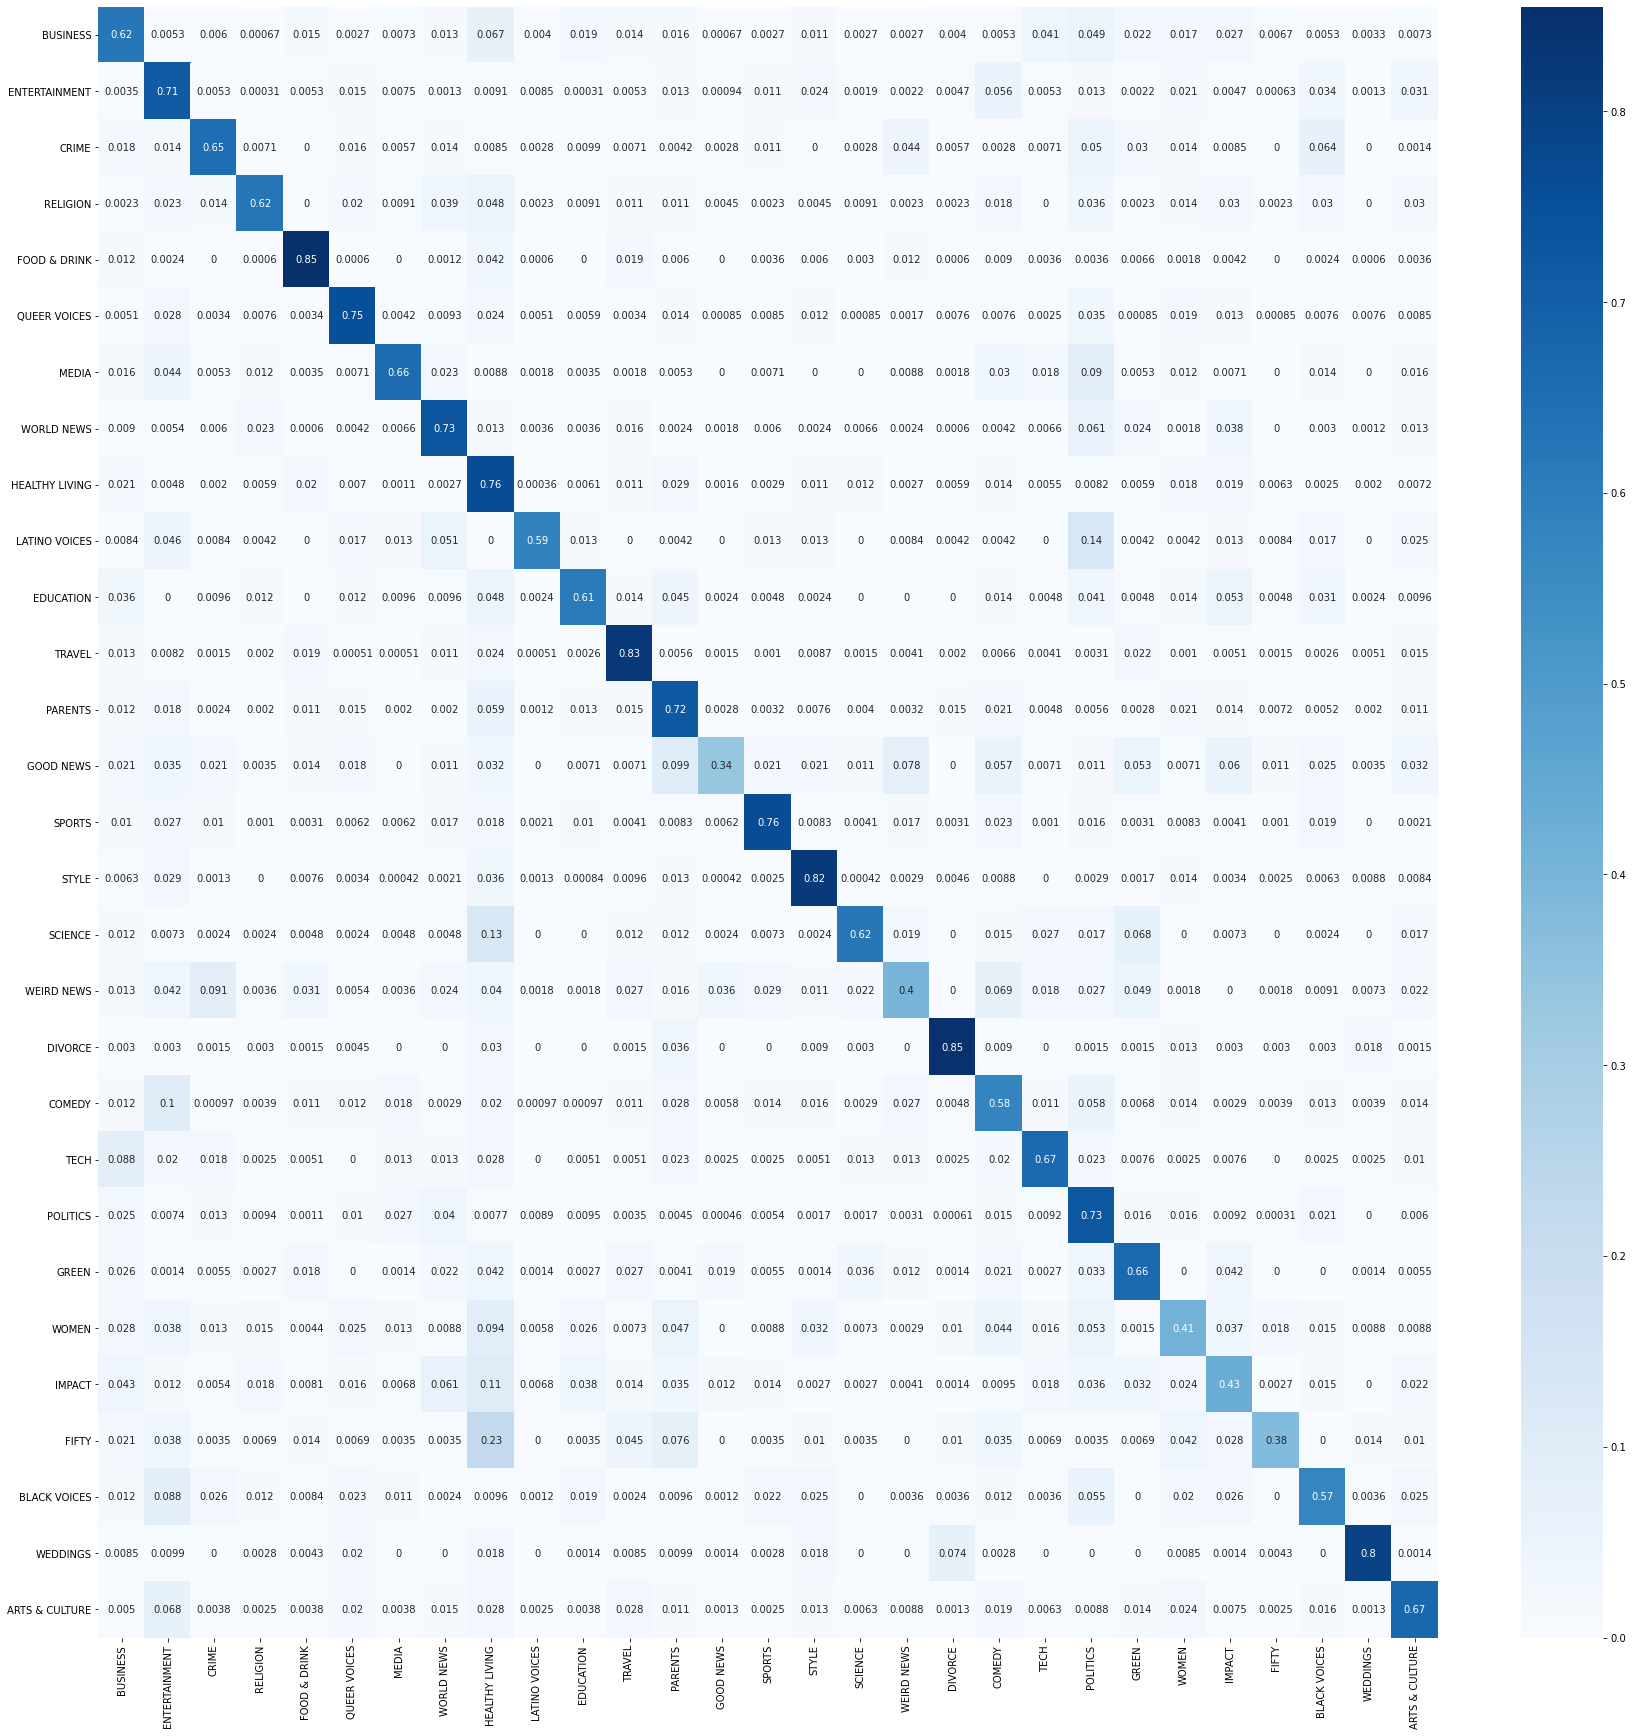

In [93]:
c_matrix = confusion_matrix(y_true, y_pred, labels=label_values, normalize = "true")

import pandas as pd
import seaborn as sns
from pylab import savefig

df_cm = pd.DataFrame(c_matrix, index = label_list,columns = label_list)
plt.rcParams['figure.figsize'] = (30,30)
matrix = sns.heatmap(df_cm, annot=True, cmap='Blues')


In [94]:
all_texts = list_of_sentences
all_labels = number_labels

all_encodings = tokenizer(all_texts, return_tensors='pt', truncation=True, padding=True)


class classHierDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: (val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

full_dataset = classHierDataset(all_encodings, all_labels)
full_dataset_loader = DataLoader(full_dataset, batch_size=16, shuffle=True)


In [95]:
pre_outputs_states = []
all_labels = []

model.eval()

for idx, batch in enumerate(full_dataset_loader):
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

    outputs, feat_for_tsne = model(input_ids, attention_mask=attention_mask)
    pre_classified = feat_for_tsne.cpu().detach().numpy()
    
    #for tsne predictions 
    for item in pre_classified:
        pre_outputs_states.append(item)
        
    # ground truth labels
    for item in labels:
        all_labels.append(item)

In [96]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components = 2, perplexity = 40, n_jobs = -1, random_state = 0).fit_transform(pre_outputs_states)
print(X_embedded.shape)

(198123, 2)


In [135]:
label_list = list(category_news.keys())
index_class_map_dict={}

for idx, value in enumerate(label_list):
    index_class_map_dict[idx]=value
    

target_labels = np.asarray(all_labels)

politics_embeddings = []
black_voices_embeddings = [] 
world_news_embeddings = []

comedy_embeddings = []
entertainment_embeddings = []
healthy_living_embeddings = []

food_and_drink_embeddings = []
women_embeddings = []
fifty_embeddings = []

science_embeddings = []


print(index_class_map_dict1)

for idx, val in enumerate(target_labels):
    
    # politics class
    if val == 21:
        politics_embeddings.append(X_embedded[idx])
        
    # black voices     
    if val == 26:
        black_voices_embeddings.append(X_embedded[idx])
        
    # world news      
    if val == 7:
        world_news_embeddings.append(X_embedded[idx])
        
    # comdedy
    if val == 19:
        comedy_embeddings.append(X_embedded[idx])
        
    # entertainment    
    if val == 1:
        entertainment_embeddings.append(X_embedded[idx])
        
    # healthy living     
    if val == 8:
        healthy_living_embeddings.append(X_embedded[idx])
        
    # food and drink
    if val == 4:
        food_and_drink_embeddings.append(X_embedded[idx])
    
    # women 
    if val == 23:
        women_embeddings.append(X_embedded[idx])
    
    # fifty 
    if val == 25:
        fifty_embeddings.append(X_embedded[idx])
        
    # science 
    if val == 16:
        science_embeddings.append(X_embedded[idx])
    

{'BUSINESS': 0, 'ENTERTAINMENT': 1, 'CRIME': 2, 'RELIGION': 3, 'FOOD & DRINK': 4, 'QUEER VOICES': 5, 'MEDIA': 6, 'WORLD NEWS': 7, 'HEALTHY LIVING': 8, 'LATINO VOICES': 9, 'EDUCATION': 10, 'TRAVEL': 11, 'PARENTS': 12, 'GOOD NEWS': 13, 'SPORTS': 14, 'STYLE': 15, 'SCIENCE': 16, 'WEIRD NEWS': 17, 'DIVORCE': 18, 'COMEDY': 19, 'TECH': 20, 'POLITICS': 21, 'GREEN': 22, 'WOMEN': 23, 'IMPACT': 24, 'FIFTY': 25, 'BLACK VOICES': 26, 'WEDDINGS': 27, 'ARTS & CULTURE': 28}


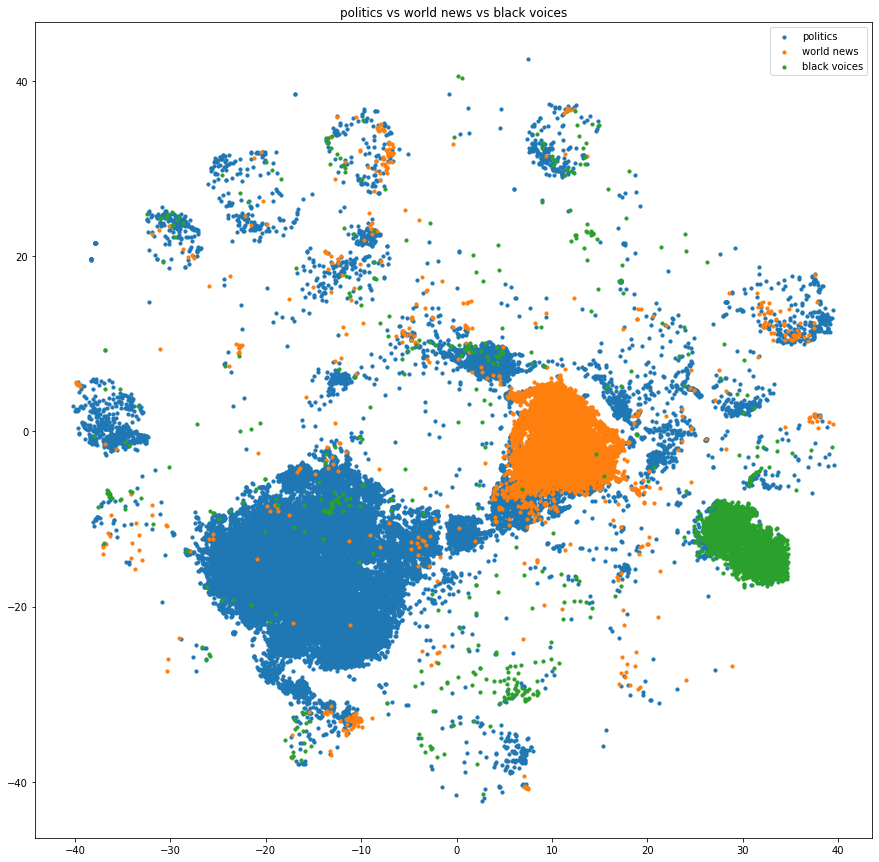

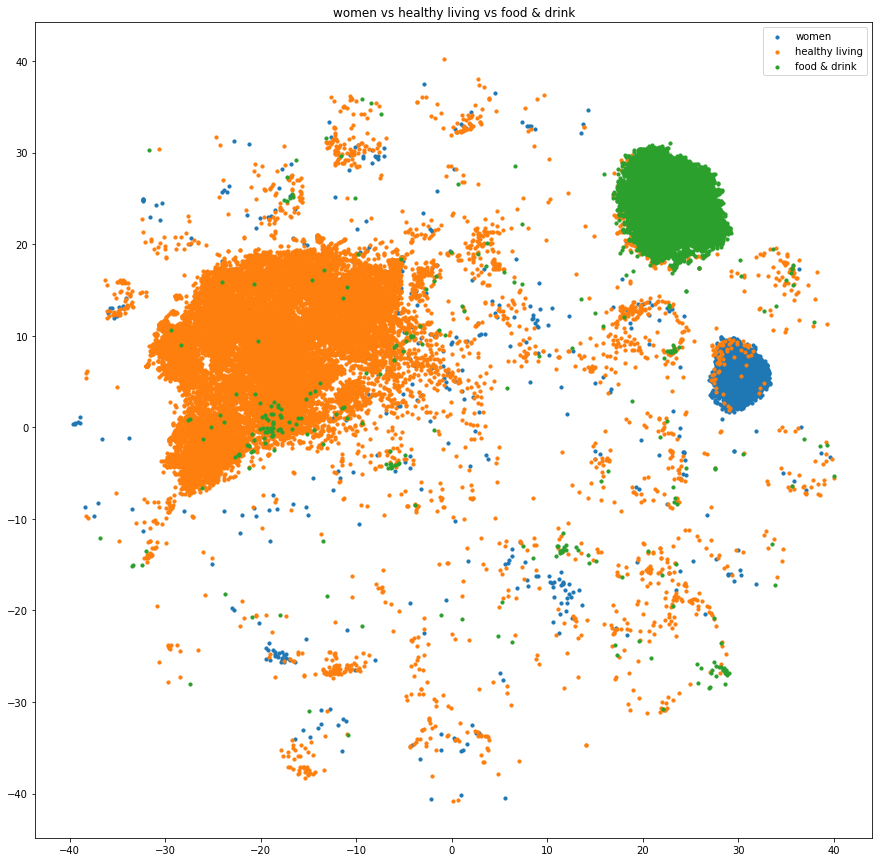

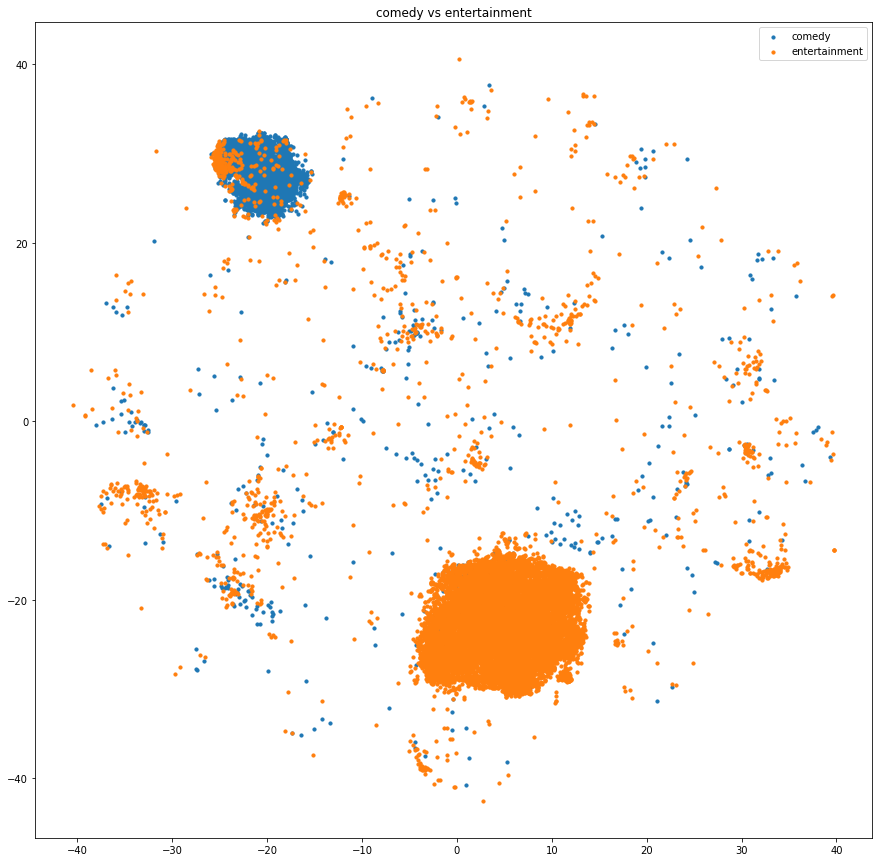

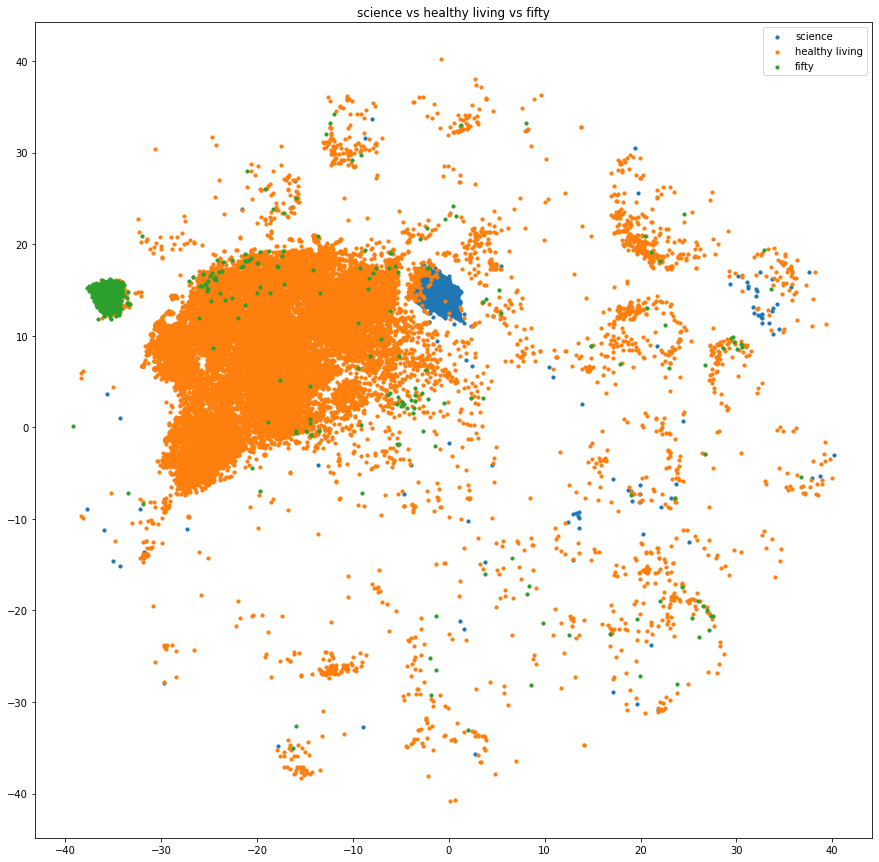

In [136]:
from numpy import exp, loadtxt, pi, sqrt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import numpy as np
from sklearn.mixture import GaussianMixture

path = os.getcwd()

folder = "newBERT_tSNE_figs"

fig = plt.figure(figsize=(15,15))

x = np.asarray(politics_embeddings)[:, 0]
y = np.asarray(politics_embeddings)[:, 1]

out = plt.scatter(x,y, 10)
x1 = np.asarray(world_news_embeddings)[:, 0]
y1 = np.asarray(world_news_embeddings)[:, 1]
out = plt.scatter(x1,y1, 10)

x2 = np.asarray(black_voices_embeddings)[:, 0]
y2 = np.asarray(black_voices_embeddings)[:, 1]
out = plt.scatter(x2,y2, 10)
                                       
plt.title("politics vs world news vs black voices")
plt.legend(["politics","world news", "black voices"])

FILE = "politics vs world news vs black voices.png"
path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

file_name = path_save
plt.savefig(file_name)
plt.show()



fig = plt.figure(figsize=(15,15))

x = np.asarray(women_embeddings)[:, 0]
y = np.asarray(women_embeddings)[:, 1]


out = plt.scatter(x,y, 10)
x1 = np.asarray(healthy_living_embeddings)[:, 0]
y1 = np.asarray(healthy_living_embeddings)[:, 1]
out = plt.scatter(x1,y1, 10)

x2 = np.asarray(food_and_drink_embeddings)[:, 0]
y2 = np.asarray(food_and_drink_embeddings)[:, 1]
out = plt.scatter(x2,y2, 10)
                                       
plt.title("women vs healthy living vs food & drink")
plt.legend(["women","healthy living", "food & drink"])

FILE = "women vs healthy living vs food & drink.png"
path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

file_name = path_save
plt.savefig(file_name)
plt.show()



fig = plt.figure(figsize=(15,15))

x = np.asarray(comedy_embeddings)[:, 0]
y = np.asarray(comedy_embeddings)[:, 1]

out = plt.scatter(x,y, 10)

x1 = np.asarray(entertainment_embeddings)[:, 0]
y1 = np.asarray(entertainment_embeddings)[:, 1]
out = plt.scatter(x1,y1, 10)

                                       
plt.title("comedy vs entertainment")
plt.legend(["comedy","entertainment"])


FILE = "comedy vs entertainment.png"
path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

file_name = path_save
plt.savefig(file_name)
plt.show()


fig = plt.figure(figsize=(15,15))

x = np.asarray(science_embeddings)[:, 0]
y = np.asarray(science_embeddings)[:, 1]


out = plt.scatter(x,y, 10)
x1 = np.asarray(healthy_living_embeddings)[:, 0]
y1 = np.asarray(healthy_living_embeddings)[:, 1]
out = plt.scatter(x1,y1, 10)

x2 = np.asarray(fifty_embeddings)[:, 0]
y2 = np.asarray(fifty_embeddings)[:, 1]
out = plt.scatter(x2,y2, 10)
                                       
plt.title("science vs healthy living vs fifty")
plt.legend(["science","healthy living", "fifty"])

FILE = "science vs healthy living vs fifty.png"
path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

file_name = path_save
plt.savefig(file_name)
plt.show()


In [149]:
from sklearn.mixture import GaussianMixture

X = np.asarray(politics_embeddings)
gm_p = GaussianMixture(n_components=1, random_state=0).fit(X)

print("means for politics", gm_p.means_)
print("covariance for politics", gm_p.covariances_)

X1 = np.asarray(world_news_embeddings)
gm_wn = GaussianMixture(n_components=1, random_state=0).fit(X1)

print("means for world_news", gm_wn.means_)
print("covariance for world_news", gm_wn.covariances_)

X2 = np.asarray(comedy_embeddings)
gm_c = GaussianMixture(n_components=1, random_state=0).fit(X2)

print("means for comedy", gm_c.means_)
print("covariance for comedy", gm_c.covariances_)

X3 = np.asarray(entertainment_embeddings)
gm_e = GaussianMixture(n_components=1, random_state=0).fit(X3)

print("means for entertainment", gm_e.means_)
print("covariance for entertainment", gm_e.covariances_)











means for politics [[-10.18673144 -11.7660681 ]]
covariance for politics [[[159.82503697  39.8165572 ]
  [ 39.8165572  124.83599657]]]
means for world_news [[10.20888814 -0.91060295]]
covariance for world_news [[[37.40376844 -1.19069057]
  [-1.19069057 35.21554008]]]
means for comedy [[-18.55880735  24.42940805]]
covariance for comedy [[[ 72.42648234 -58.61690213]
  [-58.61690213 139.11011437]]]
means for entertainment [[  4.00684863 -20.46406271]]
covariance for entertainment [[[ 68.44647024 -28.61439495]
  [-28.61439495 105.37211176]]]


In [142]:
from matplotlib.colors import ListedColormap
gen = np.random.default_rng(6)
rgb = gen.uniform(size=(29, 3))
gen.shuffle(rgb)
a = np.ones((29,1))
rgba = np.concatenate([rgb, a], 1)
cmap = ListedColormap(rgba)

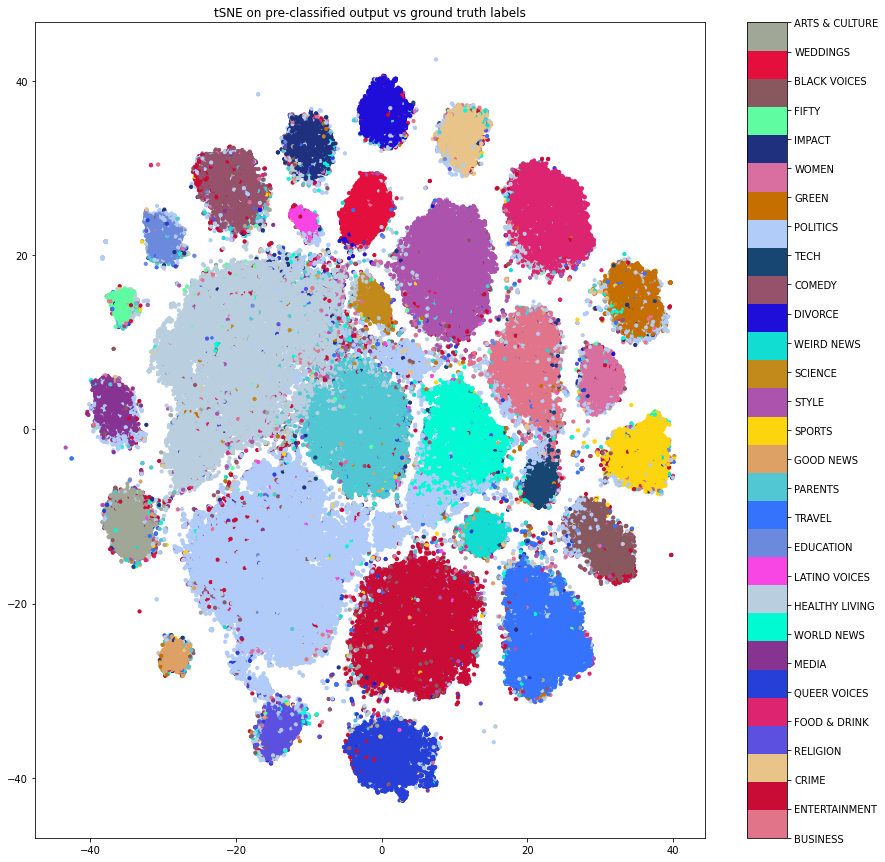

In [143]:
path = os.getcwd()

folder = "newBERT_tSNE_figs"
FILE = "clustered_tSNE.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)


fig = plt.figure(figsize=(15,15))
#cmap = plt.get_cmap('Set3', 29)
out = plt.scatter(X_embedded[:,0],X_embedded[:,1], 10, c = all_labels, cmap=cmap)
cbar = plt.colorbar(out, ticks = np.arange(29))
cbar.set_ticklabels(list(index_class_map_dict1.keys()))
plt.title("tSNE on pre-classified output vs ground truth labels")
#file_name = path_save

#plt.savefig(file_name)
plt.show()



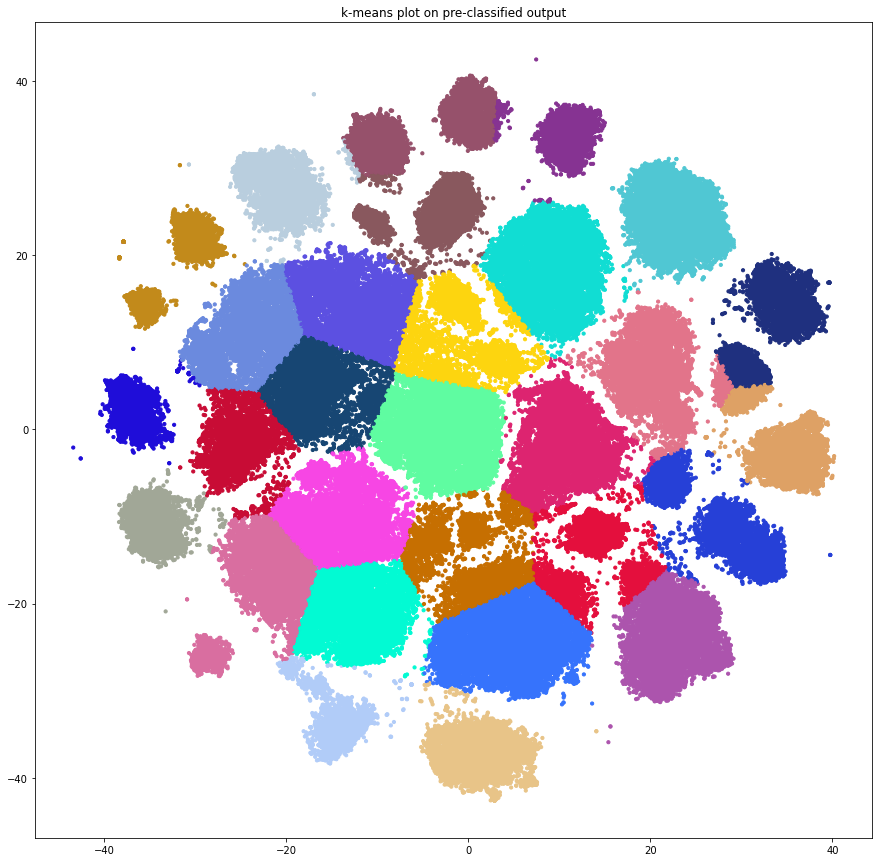

In [43]:
from sklearn.cluster import KMeans

kmeans = KMeans(29, random_state=0)
c_labels = kmeans.fit(X_embedded).predict(X_embedded)

folder = "newBERT_tSNE_figs"
FILE = "clustered_kMeans.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

fig = plt.figure(figsize=(15,15))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], 10, c=c_labels, cmap=cmap)
plt.title("k-means plot on pre-classified output")
#file_name = path_save

#plt.savefig(file_name)
plt.show()


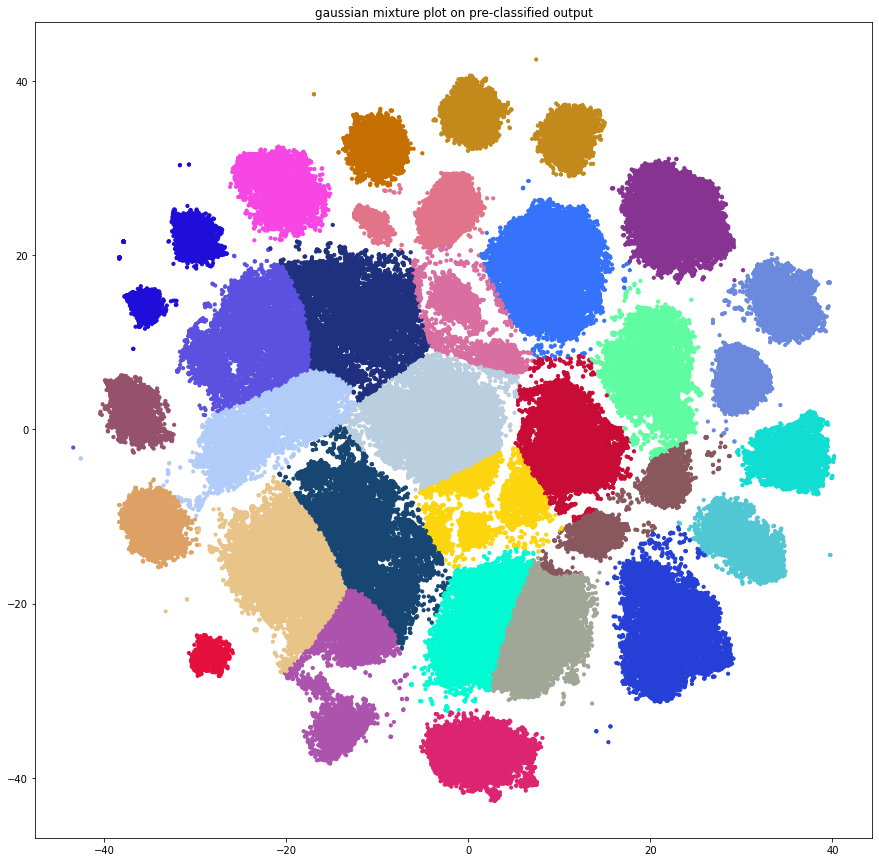

In [44]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=29, random_state=0).fit(X_embedded)
g_labels = gmm.predict(X_embedded)

folder = "newBERT_tSNE_figs"
FILE = "clustered_Gaussian.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

fig = plt.figure(figsize=(15,15))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], 10, c=g_labels, cmap=cmap)
plt.title("gaussian mixture plot on pre-classified output")

#file_name = path_save

#plt.savefig(file_name)
plt.show()


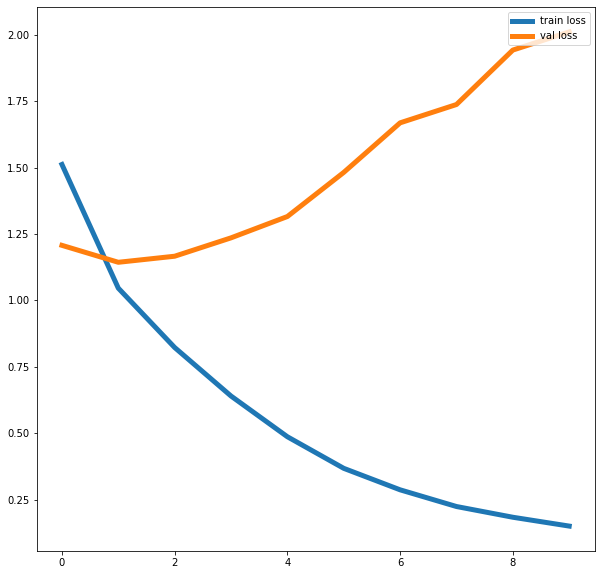

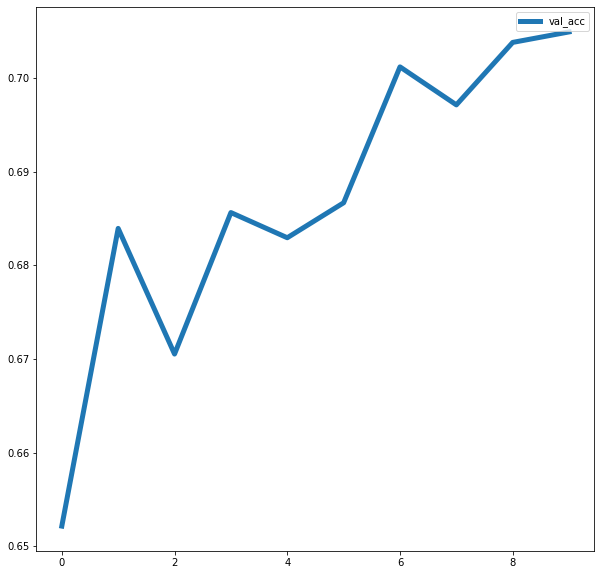

In [117]:
"""import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np

epochs =[]

for i in range(10):
    epochs.append(i)

plt.figure(figsize=(10,10))
plt.plot(epochs, train_losses, linewidth=5)
plt.plot(epochs, val_losses, linewidth=5)
plt.legend(['train loss', 'val loss'], loc = 'upper right')

path = os.getcwd()
folder = "figs"
FILE = "loss-bert.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

plt.savefig(path_save)
plt.show()

plt.figure(figsize=(10,10))
plt.plot(epochs, val_acc, linewidth =5)
plt.legend(['val_acc'], loc = 'upper right')

path = os.getcwd()
folder = "figs"
FILE = "acc-bert.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

plt.savefig(path_save)
plt.show()

path = os.getcwd()
folder = "figs"
FILE = "confusion_matrix_unweighted.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

figure = matrix.get_figure()    
figure.savefig(path_save, dpi=500)

f = open("values.txt",'w')
for i in range(len(epochs)):
    
    f.write("train_loss for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(train_losses[i]) + "\n")
    f.write("train_acc for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(train_acc[i]) + "\n")
    f.write("val_loss for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(val_losses[i]) + "\n")
    f.write("val_acc for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(val_acc[i]) + "\n")
    f.write("F1 macro score for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(f1_score_macro[i]) + "\n")
    f.write("F1 macro raw for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(f1_score_raw[i]) + "\n")
    f.write("\n""\n")
f.close()
    
    

In [119]:
import os
import shutil

path = os.getcwd()

shutil.rmtree("bert_model1")
os.mkdir("bert_model1")

folder = "bert_model1"
FILE = "model1.pth"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss
            }, path_save)